# Class 02 : 미분의 개념

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp

sp.init_printing()

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from diff import compare_1over100_with_exact, est_limit, make_df

## 미분 기초 :  실생활과 밀접한 미분

- 본 수업에서 최종적으로 살펴볼 선형 회귀는 결국 우리의 가설과 데이터 간의 에러를 줄이는 것이 목적인데 그 과정에서 가장 중요한 개념이 미분

- 선형 회귀 뿐만 아니라 모든 머신러닝은 최적화 과정이라 할 수 있는데 미분의 개념은 최적화의 많은 알고리즘에 중요한 위치를 차지


- 본 수업의 미분 파트에서는 다음과 같은 것들을 알아보기로 한다.
    - 극한의 개념 
    - 미분의 개념
    - 컴퓨터로 미분하는 방법
    
    

- 본격적으로 미분을 알아보기 앞서 학습에 도움이되는 툴인 `sympy`를 소개

### Sympy<sup>[sympy]</sup>

> SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python. <br/> - http://www.sympy.org

<img src="imgs/sympy.png"/>

- 위 설명처럼 `Sympy` 를 사용하면 계산에서 기호를 다룰 수 있는데 우리 수업에서는 극한과 미분 예제의 확인을 위해 사용

- 극한과 미분의 복잡한 실제 계산 보다는 정확한 개념과 파이썬 코드 구현을 중심으로 리뷰하고 계산은 `Sympy`에게 맡김 

- 다음은 간단한 사용법으로 기호 `x`를 정의하고 기호를 다루는 예를 보여주고 있다.

```python
import sympy as sp

x = sympy.Symbol('x')
sympy.limit((x**2-1)/(x-1), x, 1) # 극한값을 구한다.
sympy.diff(sympy.E**(2*x), x)     # 도함수를 구한다.
```


- 아래 셀을 실행해서 결과를 확인

In [3]:
x = sp.Symbol('x')
sp.limit((x**2-1)/(x-1), x, 1)

In [4]:
sp.diff(sp.E**(2*x), x)

In [5]:
sp.expand((x+1)**2)

### 미분<sup>differentiation</sup>

#### 함수의 변화

- 함수 단원에서 함수를 입력과 출력으로 생각했었는데 그렇다면 입력이 변할때 출력이 얼만큼 변하는지 생각해볼 수 있다. 

- 입력의 변화를 $\Delta \text{input}$, 출력의 변화를 $\Delta \text{output}$라 하자. 

- 그러면 다음처럼 입력의 단위 변화당 출력이 얼마나 민감하게 변하는지 나타낼 수 있다.

$$
\text{sensitivity} = \frac{\Delta \text{output}}{\Delta \text{input}}
$$

- 이런 입력의 단위 변화당 출력의 민감도가 어떤 정보를 줄 수 있을까? 

- 생활의 많은 순간 우리는 함수의 민감도를 고려해서 의사 결정을 하고 있다. 다음 두 경우가 함수 관계를 만족시킨다는 가정을 두고 생각해보자.




- 주식투자를 한다면
    - 입력 : 투자 이후 시간
    - 출력 : 이익금
    - 단위시간당 이익이 얼마나 늘어나는가?
    - $f: t \to \$ $


- 목욕을 한다면
    - 입력 : 수전의 회전각도
    - 출력 : 수도꼭지에서 나오는 물의 온도
    - 수도꼭지를 얼마나 돌려야 물이 적당한 온도가 되는가?
    - $f:\text{angle} \to \text{temp.}$


- 이처럼 많은 경우 입력에 대한 출력의 변화 정도를 알려주는 정보가 중요하게 사용


#### 함수의 평균적 변화 - 구간 속도위반 단속

- 이제 입력에 대한 출력의 변화 정도를 좀 더 잘 이용하고 있는 예를 들어보자. 

- 고속도로에서 구간 속도위반 단속이란 구간이 시작될때 차량을 촬영하고 구간이 끝날 때 동일 차량을 촬영해서 동일 차량이 그 구간을 제한속도로 통화하는데 걸리는 시간보다 빨리 통과하면 속도위반으로 단속하는 방식이다.

- 아래는 입력이 특정 시간이고 출력이 그 시간까지 이동한 거리인 함수를 그리는 python코드와 그래프이다.

- 예를 들어 대구 수성IC-동서울TG 간 275km를 210분동안 운행했을때 시간에 따른 운행 위치를 나타낸다고 하면 다음과 같은 그래프가 그려질 것이다.

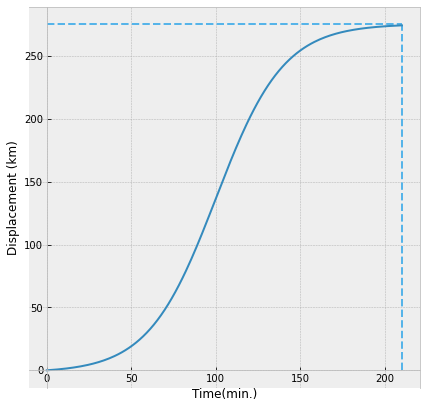

90분에서 100분 사이의 평균속도 : 203.67km/h


In [6]:
fig, ax = plt.subplots()
fig.set_size_inches((7,7))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

a = 20
b = 100
c = 1.32
Km = 275
T = 210

def D(t):
    """
    0분에서 t분까지 이동거리를 구해주는 함수
    """
    def f(x):
        return 1 / (1+np.exp( -(1/a)*(x-b) )) * T * c

    return f(t)-f(0)

def avg_kmh(T):
    return ( D(T[1]) - D(T[0]) ) / (T[1]-T[0]) * 60.0
    

t = np.linspace(0, T, 200)
d = D(t)

ax.plot(t, np.ones(t.shape)*Km, '--', color=style_colors[6])
ax.plot(np.ones(t.shape)*T, d, '--', color=style_colors[6])
ax.plot(t, d)
ax.set_xlabel('Time(min.)')
ax.set_ylabel('Displacement (km)')
plt.show()

# 시간의 구간을 지정하고 구간의 평균속도를 확인해보자.
# 전구간 : [0, T]
# 과속   : 
ts = [90, 100]
print("{}분에서 {}분 사이의 평균속도 : {:.2f}km/h".format(ts[0], ts[1], avg_kmh(ts)))

- 구간 속도위반 단속카메라가 시작점인 대구 수성IC에 있고 끝점인 동서울TG에 있다면 위처럼 운행한 차량은 100km/h 제한 고속도로에서 속도위반에 걸리지 않는다. 

-  `0분에서 210분 사이의 평균속도 : 78.35km/h`
    
    
- 하지만 정말 속도 위반을 하지 않았을까? 단속 시작 카메라를 운행을 시작한지 90분쯤 되는 위치로 옮기고 단속 종료 카메라를 110분쯤 되는 위치로 옮겨보면 무려 200km/h로 달린것을 알 수 있다. 

- ####  위 코드에서 `ts = [90, 100]`를 `ts = [90,T]`로 수정하고 실행해보면 결과는 다음과 같다.

- `90분에서 100분 사이의 평균속도 : 203.67km/h`
    
- 왜 이런 문제가 발생할까? 

- 이유는 당연히 단속 구간을 너무 길게 잡아서 그런것이다. 실제로 고속도로에서 구간은 너무 길지 않고 중간에 휴게소나 졸음쉼터가 있으면 안된다!

>또 평균속도를 계산하기 때문에, 중간에 휴식하다가 과속하는 것은 막을 수 없다. 구간 내에 쉴 수 있는 곳, 특히 휴게소가 있으면 더한데, 예를들어 서해대교를 지나는 차가 행담도 휴게소를 들러 잠시 쉰다면 아무리 구간 내에서 과속을 해도 단속에 걸리지 않는 것이다. 서해대교라고 항상 강풍이 부는 건 아니기 때문에 이런 얌체가 종종 보이기도 한다.<br/>- 나무위키

- 속도는 시간-위치 함수의 변화율이고 우리는 평균속도 즉, 평균변화율을 구했다. 

- 그런데 평균을 구하는 구간이 너무 길면 변화율이 아무 의미없어지는 것을 확인했다. 

- #### 함수의 평균변화율과 평균을 구할때 **구간을 어떻게 설정해야 의미있는 변화율**이 될까 하는 것이 중요한 문제가 된다.

#### 평균변화율 

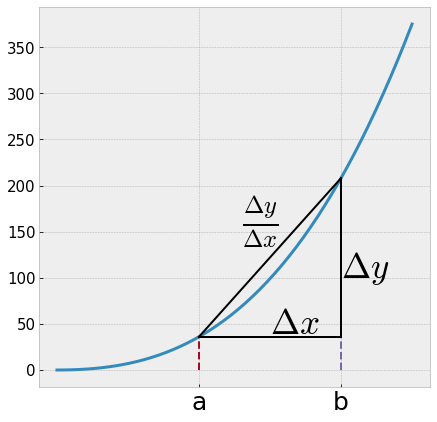

In [7]:
plt.figure(figsize=(7,7))

x = np.linspace(0,5)

def f(x):
    return 2*x**3 + 5*x**2

a , b = 2,4 

plt.plot(x, f(x), lw=3)
plt.plot( (a,a), (0, f(a)), '--', lw=2 )
plt.plot( (b,b), (0, f(b)), '--', lw=2 )
plt.plot( (a,b), (f(a), f(b)), lw=2, color='k') #평균변화율
plt.plot( (a,b), (f(a), f(a)), lw=2, color='k') #dx
plt.plot( (b,b), (f(a), f(b)), lw=2, color='k') #dy

plt.text(3, 40, r'$\Delta x$', color='black', fontdict={ 'size': 35, })
plt.text(4, 100, r'$\Delta y$', color='black', fontdict={ 'size': 35, })
plt.text(2.6, 150, r'$\frac{\Delta y}{\Delta x}$', color='black', fontdict={ 'size': 35, })
plt.xticks( [a, b], ['a', 'b'] );
plt.xticks(fontsize=25)
plt.yticks(fontsize=15)

plt.show()

- 평균변화율은 위 그래프가 직관적으로 보여주듯이 $x$의 증분 $\Delta x$에 대한 $y$의 증분 $\Delta y$의 비율로 나타낼 수 있다.


$$
\frac{\Delta y}{\Delta x} = \frac{f(b)-f(a)}{b-a} = \frac{f(a+\Delta x)-f(a)}{\Delta x}
$$


- 여기서 두 점사이의 곡선의 형태는 평균변화율에 영향을 미치지 않는다. (즉, 중간에 과속이 가능하다!) 

- 이런 상황을 막기위해 좀 더 자세한 정보가 필요하고 결과적으로 두 점사이의 간격을 좁힐 필요가 있다. (단속 카메라의 위치를 더 가깝게!) 

- 실제 그림에서 언덕의 가파른 정도는 중간 지점 이후부터 평균 기울기보다 훨씬 가파르다. (과속 구간이 실제로 있다!) 

- 따라서 a-b의 간격을 충분히 가깝게 하면 더 자세한 정보를 얻을 수 있고 이를 통해 좀 더 정밀한 과속단속이 가능할 것이다. 

#### 가장 자세한 정보를 얻기 위해......

<img src="imgs/curve-grad.png"/>


- 위 그림을 보면 언덕이 직선인 경우 어느 지점이나 경사가 똑같다. 구간을 좁힌 정보나 구간을 넓힌 평균 정보나 정보가 똑같다. 

- 반면 곡선인 경우는 모든 지점에서 경사의 가파른 정도가 다 다르다. 모든 지점에서 언덕의 가파른 정도를 알고 싶은 것이다. 앞서 a, b의 간격을 충분히 줄여 최대한 자세한 정보를 얻고 싶다고 했는데......

- 우선 간격을 0.01정도로 정해보자. 0.01이면 충분히 작은 간격이어서 순간의 변화를 계산해줄만하다. 

- ####  따라서 우리는 다음처럼 순간의 변화율을 구하기로 마음 먹었다.

<br/>

***
#### 우리 마음대로 정한 순간변화율 
$$
df(x) = \frac{f(x+0.01)-f(x)}{0.01}
$$
***

<br/>

#### 실험 1

- $y = x^2$에 대해 매우 짧은 순간의 변화율을 계산해 주는 함수가 $2x$라는 것은 알려져 있다고 하자.

- 우리의 약속이 $y = x^2$에 대해 쓸만한지 알아보자.

- `compare_1over100_with_exact()`함수는 정확한 순간변화율과 0.01을 분모로해서 계산한 변화율을 비교해주는 함수이다.

In [8]:
def compare_1over100_with_exact(x, f, df_analytic) :
    """
    x  : 순간의 변화율을 알아볼 위치
    f  : 순간의 변화율을 계산할 대상이 되는 함수
    df : 미분법을 이용하여 정확히 정의된 도함수
    
    위 세 인자를 이용하여 변화 구간을 0.01로 설정하고 계산한 순간의 변화율과
    정확히 계산한 순간의 변화율을 화면에 프린트 하세요.
    """
    print("f(x0)={}, df(x0)={:.3f} at x0={}".format(f(x),df_analytic(x), x))
    print("f(x0)={}, df(x0)={:.3f} at x0={}".format(f(x),(f(x+0.01)-f(x))/0.01, x))

In [9]:
# 1. 아래 x0 위치에서 함수 x**2의 순간변화율을 2*x로 구한다. 
# 2. 우리가 가정한 방식대로 구간을 0.01로 해서 근사된 순간변화율을 구한다.
# 3. 두 결과를 프린트하여 비교한다.

x0 = 3

# 함수와 순간의 변화율을 계산해주는 알려진 함수를 정의한다.
f  = lambda x : x**2
df = lambda x : 2*x

compare_1over100_with_exact(x0, f, df)

f(x0)=9, df(x0)=6.000 at x0=3
f(x0)=9, df(x0)=6.010 at x0=3


#### 실험 2

- 이번에는 $\dfrac{\sin(x)}{e^x}$ 같은 함수에서는 어떤지 확인해보자.

- 아직 순간변화율을 정확하게 계산하는 법은 모르지만 아래 코드에 주석처럼 `sympy`를 사용해서 정답을 안다고 가정한다.

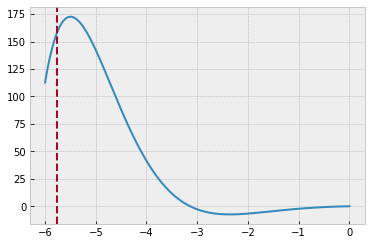

f(x0)=158.69972519957136, df(x0)=115.678 at x0=-5.7588
f(x0)=158.69972519957136, df(x0)=112.948 at x0=-5.7588


In [10]:
x0 = -5.7588

# 함수와 순간의 변화율을 계산해주는 알려진 함수를 정의한다.
f = lambda x : np.sin(x) / np.exp(x)

# sympy로 순간변화율 함수를 구해서 그대로 코딩한다.
# x = sympy.Symbol('x')
# sympy.diff(sympy.sin(x)/sympy.E**x, x)
df  = lambda x : np.exp(-x)*np.cos(x) - np.exp(-x)*np.sin(x)
ndf = lambda x : (f(x+0.01)-f(x)) / 0.01

x = np.linspace(-6, 0, 200)
plt.plot(x, f(x), lw=2)
plt.axvline(x0, color=style_colors[1], ls='--')
plt.show()

compare_1over100_with_exact(x0, f, df)




- 결과는 다음과 같게 나온다.
```python
f(x0)=158.700, df(x0) =115.678 at x0=-5.7588
f(x0)=158.700, ndf(x0)=112.948 at x0=-5.7588
```


- 실험 1에서는 그럭저럭 괜찮은 근사값이 나오지만 실험 2에서는 그렇지 못하다.

- 실험 결과 "오차가 문제에 따라 때로는 괜찮지만 때로는 문제가 될 수도 있겠다."는 결과를 내릴 수 있다.

### 극한<sup>limits</sup>



#### 극한

- 앞서 이야기한 순간의 변화율을 정의하기 위한 개념으로 극한을 알아보자. 극한이란 함수에서 정의할 수 있는 함수값과는 다른 또 다른 값이다. 정의는 다음과 같다.

- 함수 $f(x)$에서 $x$의 값이 $a$와 다른 값을 가지면서 $a$에 가까이 갈 때 $f(x)$의 값이 일정한 값 $L$에 가까워지면 

$$
\lim_{x \to a} f(x) = L
$$

- 이때 $L$을 $x \to a$일 때 함수 $f(x)$의 극한값 또는 극한이라 한다. 

- 정의만 보면 어떠 함수에 특정한 값 예를 들어 3을 대입하여 얻는 함수값이나 입력이 3으로 가까이 가면서 계속해서 얻게되는 함수의 값이나 별 다른것이 없다고 생각할 수 있다. 

- 하지만 이는 특수한 경우 다시말해 함수값과 극한값이 같은 경우로 이를 연속이라 한다. 

- 대부분 우리는 함수를 제일 먼저 연속인 경우를 통해 배우게 되므로 이런 경우를 일반적이라고 생각 하지만 일반적으로는 함수값과 극한값은 같이 않다. 

- 여기서 중요한 것은 $x$가 결코 $a$가 되지 않는다는 점, $x=a$가 되고 어떤 값이 정의된다면 그 값은 함수값이 되고, 극한값과 함수값은 같아진다.

- 다음 예를 통해 극한값과 함수값이 다를 수 있는 경우에 대해서 구체적으로 알아보자.



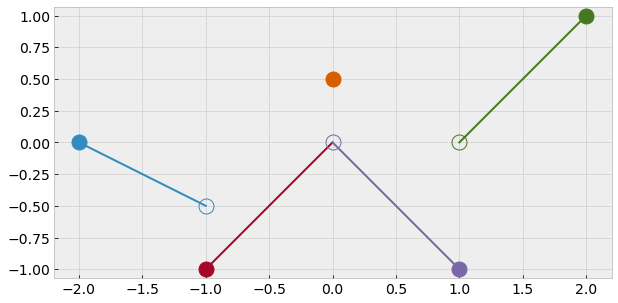

In [11]:
import matplotlib.lines as mlines

plt.figure(figsize=(10,5))

x1 = np.linspace(-2, -1, 10)
x2 = np.linspace(-1, 0, 10)
x3 = np.linspace(0, 1, 10)
x4 = np.linspace(1, 2, 10)

plt.plot(x1, -(0.5*x1+1), x2, x2, x3, -x3, x4, (x4-1))

plt.plot(-2, 0, 'o', color=style_colors[0], markersize=15,)
plt.plot(-1, -0.5, 'o', color=style_colors[0], markersize=15, fillstyle='none')

plt.plot(-1, -1, 'o', color=style_colors[1], markersize=15,)
plt.plot(0, 0, 'o',   color=style_colors[2], markersize=15, fillstyle='none')
plt.plot(1, -1, 'o',   color=style_colors[2], markersize=15, )

plt.plot(1, 0, 'o',   color=style_colors[3], markersize=15, fillstyle='none')
plt.plot(2, 1, 'o',   color=style_colors[3], markersize=15, )

plt.plot(0, 0.5, 'o',   color=style_colors[4], markersize=15, )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('equal')

plt.show()

- **경우 1** 위 함수에서 가로축 좌표 -2 오른쪽(양의 방향)에서 -2로 계속 다가가면 $\lim_{x \to -2+}$ 값은 0에 점점 수렴한다.

$$
\lim_{x \to -2+} f(x) = 0
$$
<br/><br/>

- **경우 2** 위 함수에서 -1 왼쪽(음의 방향)에서 -1로 계속 다가가는 경우$\lim_{x \to -1-}$와 오른쪽(양의 방향)에서 -1로 계속 다가가는 경우 $\lim_{x \to -1+}$ 각각 다른 값으로 수렴하게 된다.

$$
\lim_{x \to -1-} f(x) = -0.5 \quad \ne \quad \lim_{x \to -1+} f(x) = -1 \quad=\quad f(-1)=-1
$$
<br/><br/>

- **경우 3** 위 함수에서 0 왼쪽(음의 방향)에서 0으로 계속 다가가는 경우$\lim_{x \to 0-}$와 오른쪽(양의 방향)에서 0으로 계속 다가가는 경우 $\lim_{x \to 0+}$ 같은 값으로 수렴하게 된다. 단, 그 값은 함수 값과는 다르다. 

$$
\lim_{x \to 0-} f(x) = 0 \quad = \quad  \lim_{x \to 0+} f(x) = 0 \quad\ne\quad f(0) = 0.5
$$
<br/><br/>

- **경우 4**  위 함수에서 1 왼쪽(음의 방향)에서 1로 계속 다가가는 경우$\lim_{x \to 1-}$와 오른쪽(양의 방향)에서 1로 계속 다가가는 경우 $\lim_{x \to 1+}$ 각각 다른 값으로 수렴하게 된다.

$$
f(1)=-1 \quad = \quad \lim_{x \to 1-} f(x) = -1 \quad \ne \quad \lim_{x \to 1+} f(x) = 0 
$$
<br/><br/>

- **경우 5** 위 함수에서 2 왼쪽(음의 방향)에서 2로 계속 다가가면 $\lim_{x \to 2-}$ 값은 1에 수렴한다.

$$
\lim_{x \to 2-} f(x) = 1
$$
<br/><br/>

- 이런 경험으로 부터 극한의 존재를 다음처럼 정의할 수 있다.

#### 극한의 존재성 
- $x \to a$일때 함수 $f(x)$가 $L$로 수렴하면 $x \to a+$ 일때 우극한과 $x \to a-$일때 좌극한이 모두 존재하고 그 값이 $L$로 같다. 또한 그 역도 성립


- 위 경우 $\lim_{x \to -1}f(x)$, $\lim_{x \to 1}f(x)$은 존재하지 않게 된다. 실험으로부터 함수값과 극한값은 명확히 다른 것임을 개념적으로나마 이해할 수 있다.


#### 분수함수에서의 극한 

$$
f(x) = \frac{x^2 - 1}{x-1}
$$

위 함수에서 $x=1$근처에서 어떤일이 일어날까?

$$
\lim_{x \to 1} \frac{x^2 - 1}{x-1} = 2 \ne f(1)
$$

극한 값은 존재하지만 함수값 $f(1)$는 정의되지 않는다.



,x,f(x)
0,0.900000,1.900000
1,1.100000,2.100000
2,0.990000,1.990000
3,1.010000,2.010000
4,0.999000,1.999000
5,1.001000,2.001000
6,0.999999,1.999999
7,1.000001,2.000001


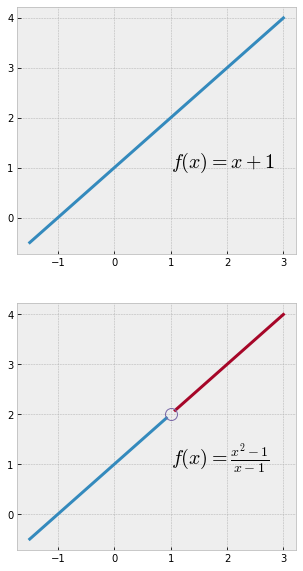

In [12]:
import pandas as pd
from IPython.display import display

x_left  = np.linspace(-1.5, 0.999999, 100)
x_right = np.linspace(1.000001, 3, 100)
x       = np.linspace(-1.5, 3, 100)

f_left  = (x_left[:-3]**2 - 1) / (x_left[:-3] -1)
f_right = (x_right[4:]**2 - 1) / (x_right[4:] -1)

f = x+1

fig = plt.figure()
fig.set_size_inches((5,10))

ax1 = fig.add_subplot(211)
ax1.plot(x, f, lw=3)
ax1.text(1, 1, r"$f(x) = x+1$", fontsize=20)

ax2 = fig.add_subplot(212)
ax2.plot(x_left[:-3], f_left, x_right[4:], f_right, lw=3)
ax2.plot(1,2, 'o', markersize=12, fillstyle='none')
ax2.text(1, 1, r"$f(x) = \frac{x^2 - 1}{x-1}$", fontsize=20)

x_near = np.array([0.9, 1.1, 0.99, 1.01, 0.999, 1.001, 0.999999, 1.000001])
f_near = (x_near**2 - 1) / (x_near -1)
near = pd.DataFrame({'x':x_near, 'f(x)':f_near})
display(near) 

plt.show()

In [13]:
x = sp.Symbol('x')

sp.limit((x**2-1)/(x-1), x, 1)

#### 실험 3 : 수치 방법으로 극한 평가<sup>estimation</sup>

- 1 변수 함수의 경우 극한값을 조사하고 싶은 $x$ 근방의 함수값을 계산하는 것으로 극한 값을 평가할 수 있다.

- `est_limit(function, x, n)`함수는 주어진 `x`값 주변의 구간을 계속 좁히면서 함수가 어느 값에 근접하는지 보여주는 함수이다.

- 함수 인자 `n`은 구간을 좁히는 절차를 몇번 반복할지 나타낸다.

In [14]:
def est_limit(f, x, n=10) :
    """
    https://math.stackexchange.com/questions/129467/numerical-computation-and-limits-of-a-function
    f   : 극한값을 조사할 함수
    x   : 극한값을 구하고 싶은 위치 즉, lim x->x
    n   : x로 다가가면서 값을 계산해 볼 횟수
    """
    for k in range(2,n) :
        # 약간의 변화를 줄 delta를 정의한다.
        delta = 2**(-k)
        
        ###########################################################################################
        # WRITE YOUR CODE HERE
        ###########################################################################################
        # left 변수에 좌측 함수값, right 변수에 우측 함수값을 할당한다.
        # 여기 left, right 를 초기화 하는 코드를 적어보세요.
        left = f(x-delta)
        right = f(x+delta)
        
        if left is not None and right is not None:
            print("delta={:f} : ({:.8f},{:.8f})".format(delta, left, right))

    return (left, right)

In [15]:
# est_limit() 함수를 아래 함수에 대해 호출하여 결과를 검증해본다.
f1 = lambda x : x**2
f2 = lambda x : (x**2 - 1) / (x - 1)
f3 = lambda x : np.sin(x) / x
f4 = lambda x : (np.sqrt(x**2 + 100.) - 10.) / x**2


print("Estimate limit of x^2 at x={}".format(3))
est_limit(f1, 3)
print('\n')

print("Estimate limit of (x^2-1)/(x-1) at x={}".format(1))
est_limit(f2, 1)
print('\n')

print("Estimate limit of sin(x)/x at x={}".format(0))
est_limit(f3, 0)
print('\n')

print("Estimate limit of (sqrt(x^2+100)-10)/x^2 at x={}".format(0))
est_limit(f4, 0)

Estimate limit of x^2 at x=3
delta=0.250000 : (7.56250000,10.56250000)
delta=0.125000 : (8.26562500,9.76562500)
delta=0.062500 : (8.62890625,9.37890625)
delta=0.031250 : (8.81347656,9.18847656)
delta=0.015625 : (8.90649414,9.09399414)
delta=0.007812 : (8.95318604,9.04693604)
delta=0.003906 : (8.97657776,9.02345276)
delta=0.001953 : (8.98828506,9.01172256)


Estimate limit of (x^2-1)/(x-1) at x=1
delta=0.250000 : (1.75000000,2.25000000)
delta=0.125000 : (1.87500000,2.12500000)
delta=0.062500 : (1.93750000,2.06250000)
delta=0.031250 : (1.96875000,2.03125000)
delta=0.015625 : (1.98437500,2.01562500)
delta=0.007812 : (1.99218750,2.00781250)
delta=0.003906 : (1.99609375,2.00390625)
delta=0.001953 : (1.99804688,2.00195312)


Estimate limit of sin(x)/x at x=0
delta=0.250000 : (0.98961584,0.98961584)
delta=0.125000 : (0.99739787,0.99739787)
delta=0.062500 : (0.99934909,0.99934909)
delta=0.031250 : (0.99983725,0.99983725)
delta=0.015625 : (0.99995931,0.99995931)
delta=0.007812 : (0.99998983,0.9

- 위 코드는 극한의 정의에 입각해서 좌, 우측의 함수값을 계속 해당 지점으로 좁히면서 양측의 함수값이 어떤 값으로 수렴하는지를 보고 있다. 

- 극한의 정의를 그대로 따르고 있지만 수치적인 오차때문에 항상 정확하게 계산되는 것은 아니라는 점을 주의해야 한다. 

- 예를 들어 마지막 `f4`함수의 평가횟수를 `n=30`으로 하고 코드를 실행해보자.


In [16]:
print("Estimate limit of (sqrt(x^2+100)-10)/x^2 at x={}".format(0))
est_limit(f4, 0, n=30)

Estimate limit of (sqrt(x^2+100)-10)/x^2 at x=0
delta=0.250000 : (0.04999219,0.04999219)
delta=0.125000 : (0.04999805,0.04999805)
delta=0.062500 : (0.04999951,0.04999951)
delta=0.031250 : (0.04999988,0.04999988)
delta=0.015625 : (0.04999997,0.04999997)
delta=0.007812 : (0.04999999,0.04999999)
delta=0.003906 : (0.05000000,0.05000000)
delta=0.001953 : (0.05000000,0.05000000)
delta=0.000977 : (0.05000000,0.05000000)
delta=0.000488 : (0.05000000,0.05000000)
delta=0.000244 : (0.05000001,0.05000001)
delta=0.000122 : (0.04999995,0.04999995)
delta=0.000061 : (0.05000019,0.05000019)
delta=0.000031 : (0.04999924,0.04999924)
delta=0.000015 : (0.05000305,0.05000305)
delta=0.000008 : (0.04998779,0.04998779)
delta=0.000004 : (0.05004883,0.05004883)
delta=0.000002 : (0.04980469,0.04980469)
delta=0.000001 : (0.05078125,0.05078125)
delta=0.000000 : (0.04687500,0.04687500)
delta=0.000000 : (0.06250000,0.06250000)
delta=0.000000 : (0.00000000,0.00000000)
delta=0.000000 : (0.00000000,0.00000000)
delta=0.0

- 점점 구간을 좁해서 $x=0$근처의 값을 찍다보면 어느순간 0으로 수렴하는것 처럼 보이게 된다. 

- 실제로 극한값이 0이 아닌데 이는 수치계산의 오차때문에 생기는 현상이다. 

- 해석적으로 정확한 극한값을 구하는 것은 주어진 함수 형태에 따라 매우 다양한 접근법이 있다. 

- 우리는 극한의 정확한 의미를 이해하는 것이 목적이므로 이정도에서 순간변화율(미분계수) 이야기로 넘어가도록 하자.

#### 순간변화율(미분계수)The Derivative at a Point

- 이제 순간변화율을 계산하기위해 설정했던 매우 작은 변화 구간 0.01을 극한의 개념으로 대체시킨다.

$$
\frac{f( x + \color{#A60628}{0.01} )-f(x)}{\color{#A60628}{0.01}}, \quad \frac{f(x+\color{#A60628}{0.001})-f(x)}{\color{#A60628}{0.001}}, \quad \frac{f(x+\color{#A60628}{0.0001})-f(x)}{\color{#A60628}{0.0001}}, \dots
$$

- 위처럼 작은 변량 0.01을 계속 줄여보자. 위 식에서 변화하고 있는 양은 0.01, 0.001, 0.001, ... 이다. 

- #### 이를 $h$라는 변수로 두자. 그러면 아래와 같은 새로운 함수 $df(\color{#A60628}{h})$를 얻게 된다.

$$
df(\color{#A60628}{h}) = \frac{f(x+\color{#A60628}{h})-f(x)}{\color{#A60628}{h}} \tag{*}
$$

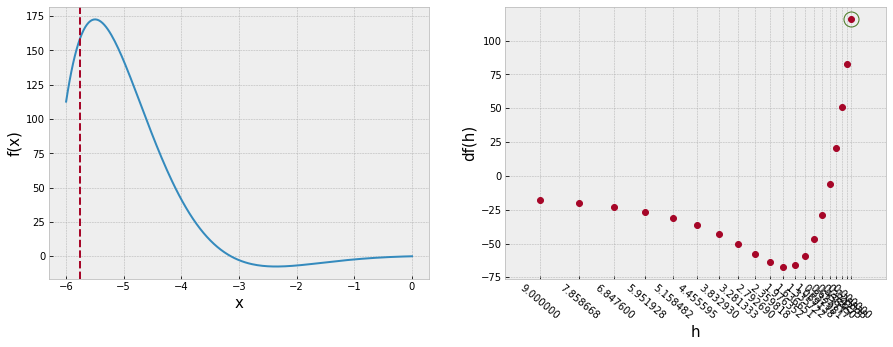

In [17]:
fig = plt.figure()
fig.set_size_inches((15,5))

h = np.logspace(0, 1, 20) - 1 + np.finfo(np.float32).eps
x = np.linspace(-6, 0, 200)
f = lambda x : np.sin(x) / np.exp(x)

# sympy로 순간변화율 함수를 구해서 그대로 코딩한다.
# x = sympy.Symbol('x')
# sympy.diff(sympy.sin(x)/sympy.E**x, x)
df  = lambda x : np.exp(-x)*np.cos(x) - np.exp(-x)*np.sin(x)
def dfh(h, x):
    return (f(x+h)-f(x)) / h

x0 = -5.7588
ax1 = fig.add_subplot(121)
ax1.plot(x, f(x), lw=2)
ax1.axvline(x0, color=style_colors[1], ls='--')
ax1.set_xlabel('x', fontsize=15)
ax1.set_ylabel('f(x)', fontsize=15)

xlabels = ['%f' % h_ for h_ in h]
dfhs = dfh(h, x0)
ax2 = fig.add_subplot(122)
ax2.plot(h, dfhs, 'o', color=style_colors[1],)
ax2.plot(0, df(x0), 'o', lw=2, fillstyle='none', color=style_colors[3], markersize=15,)
ax2.set_xlim(10, -1.0)
ax2.set_xticks(h)
ax2.set_xticklabels(xlabels, rotation=-40)
ax2.set_xlabel('h', fontsize=15)
ax2.set_ylabel('df(h)', fontsize=15)

#plt.axis('equal')
plt.show()


- 위 함수에서 독립변수 $h$가 0일 때 극한값을 알 수 있다면 우리는 진정으로 '순간변화율'을 알 수 있게 된다!

#### 실험 4

- 순간변화율을 계산해보자.

- 함수 $f(x)$를 넘겨받아 식(\*)의 $df(h)$를 만들어내는 함수 `make_fh(f, x)`를 만든다.


- 지금까지 만든 코드를 모아서 순간변화율을 구할 수 있게 된다.
    - 임의의 함수 $f(x)$를 정의
    - $f(x)$를 이용해서 $df(h)$를 만듬
    - $df(h)$의 $h=0$에서의 극한값을 구함
    
    
- 실험 2에서 0.01로 구간설정을 한 경우 정확하게 순간변화율을 구할 수 없었던 함수 $\dfrac{\sin(x)}{e^x}$에 대해 실험해본다.

In [18]:
def make_df(f, x) :
    """
    f : 순간변화율을 구할 함수
    x : 순간변화율을 구할 변수의 위치
    """
    # df(h)라는 함수를 정의해서 그 함수를 리턴함
    # df(h)는 위 식(*)를 사용해서 f(x)를 h의 함수로 바꾼 함수
    def df(h) :
        return (f(x+h) - f(x)) / h
    
    # 만들어진 df(h)를 리턴한다.
    return df

In [19]:
#############################################################
# 실험2와 동일한 조건
x0 = -5.7588
fx = lambda x : np.sin(x) / np.exp(x)

# make_df가 fx를 fh로 만들어주고 우리는 fh의 0에서의 극한값을 구하면
# 순간변화율(미분 계수)를 구할 수 있게 된다!
dfh = make_df(fx, x0)
est_limit(dfh, 0, 20)

delta=0.250000 : (193.68950521,55.68021770)
delta=0.125000 : (152.28105679,83.58357855)
delta=0.062500 : (133.39653603,99.08645471)
delta=0.031250 : (124.39372384,107.24352358)
delta=0.015625 : (120.00014286,111.42564803)
delta=0.007812 : (117.83004860,113.54287686)
delta=0.003906 : (116.75164272,114.60806631)
delta=0.001953 : (116.21409597,115.14230894)
delta=0.000977 : (115.94573612,115.40984276)
delta=0.000488 : (115.81165952,115.54371286)
delta=0.000244 : (115.74464704,115.61067371)
delta=0.000122 : (115.71114725,115.64416059)
delta=0.000061 : (115.69439897,115.66090564)
delta=0.000031 : (115.68602524,115.66927857)
delta=0.000015 : (115.68183847,115.67346514)
delta=0.000008 : (115.67974512,115.67555844)
delta=0.000004 : (115.67869845,115.67660511)
delta=0.000002 : (115.67817511,115.67712842)


In [20]:
5.1*3.1

- 위 실험 결과처럼 우리가 관심있는 순간이 $x=a$라면 다음과 같다.

$$
f'(a) = \frac{d}{dx}f(a) = \color{RoyalBlue}{\lim_{h \to 0} \frac{f(a+h)-f(a)}{h}} = \color{OrangeRed}{ \lim_{x \to a} \frac{f(x)-f(a)}{x-a}}
$$

- 위 식의 극한이 존재하면 이 극한값을 $x=a$에서 순간변화율 또는 미분계수라 한다. 

- 아래 그림은 위처럼 정의된 순간변화율이 그 위치에서 언덕의 기울기 즉, 접선의 기울기임을 보여준다. 

- a와 b의 간격을 계속 좁히다보면 두 점을 이은 빨간색 직선이 a와 b가 만나는 점에서의 기울기가 되는 것을 알 수 있다. 

- 위 그림의 경우 입력이 증가할 때 출력도 증가하므로 양의 기울기를 가진다. 

- 실제 계산되는 미분계수도 양수이다. 반대의 경우는 음의 기울기를 가지고 미분계수도 음수가 될 것이다.

<img src="imgs/diff-ani.gif" width=380/>

- 구간의 차이로 순간변화율을 계산하고 그 구간을 극한으로 좁힐 경우 순간변화율을 구할 위치에서 양쪽 방향 모두 미분계수가 같아야 한다. 아래 그림과 같다.

<img src="imgs/diff-ani-psb.gif" width=380/>

- 그런데 어떤 함수의 좌우 극한 값이 다른 경우를 이미 확인한바 있다. 순간변화율은 극한값으로 정의되는데 그 순간 좌우 극한값이 다르다면 정의될 수 없고 이 경우 미분 불가능이라 한다. 

- 아래 그림은 함수 $2x^3 + 5x^2 +20|x-3|$의 그래프이고 $x=3$에서 미분 불가능함을 나타낸다.

<img src="imgs/diff-ani-impsb.gif" width=380/>

- 실제 우리가 만든 코드를 사용하여 함수 $df(h)$의 좌우 극한값을 평가 해보면 다른것을 확인할 수 있다. 

#### 실험 5

- 아래 함수에 대해서 `make_fh()`, `est_limit()`함수를 사용하여 $x=3$에서 순간변화율을 검증해보자

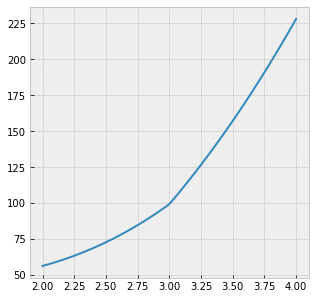

delta=0.250000 : (58.37500000,109.87500000)
delta=0.125000 : (61.15625000,106.90625000)
delta=0.062500 : (62.57031250,105.44531250)
delta=0.031250 : (63.28320312,104.72070312)
delta=0.015625 : (63.64111328,104.35986328)
delta=0.007812 : (63.82043457,104.17980957)
delta=0.003906 : (63.91018677,104.08987427)
delta=0.001953 : (63.95508575,104.04492950)
delta=0.000977 : (63.97754097,104.02246284)
delta=0.000488 : (63.98877001,104.01123095)
delta=0.000244 : (63.99438488,104.00561535)
delta=0.000122 : (63.99719241,104.00280765)
delta=0.000061 : (63.99859620,104.00140382)
delta=0.000031 : (63.99929810,104.00070191)
delta=0.000015 : (63.99964905,104.00035095)
delta=0.000008 : (63.99982452,104.00017548)
delta=0.000004 : (63.99991226,104.00008774)
delta=0.000002 : (63.99995613,104.00004387)


In [21]:
plt.figure(figsize=(5,5))

fx = lambda x : (2*x**3 + 5*x**2) + 20*np.abs(x-3)

x = np.linspace(2, 4, 100)
plt.plot(x, fx(x))
plt.show()

dfh = make_df(fx, 3)
est_limit(dfh, 0, 20)

#### 선형근사와 함수값 추정<sup>[thomas]</sup>

- 한 지점에서 순간변화율을 알면 그 지점 근처의 함수값을 쉽게 추정할 수 있다. 

- 이는 우리가 어떤 현상을 보고 지금까지 추세를 바탕으로 조금 후의 미래를 짐작하는 행위와 비슷하다 할 수 있다. 다음 그림을 보자.

<img src="imgs/linearization.png" width="700"/>


- $y=x^2$라는 함수가 주어졌을 때 어떤 지점 $x=a$에서 함수값과 순간변화율 $f'(a)$안다고 하자. $(a, f(a))$를 지나고 기울기가 $f'(a)$인 직선 $L(x)$는 다음처럼 쓸 수 있다.

$$
L(x) = f(a) + f'(a)(x-a)
$$

- 이제 $a$로 부터 $\Delta x$만큼 떨어진 위치의 함수값을 알고 싶다면 $f(a+\Delta x)$를 직접 계산해도 되지만 이것이 힘들 경우 ($\sin(\frac{\pi}{6} + 0.01)$을 계산한다고 생각해보자!)

- $L(x)$를 계산하여 대신할 수 있다. $\Delta x$가 크지 않다면 $\Delta y \approx \Delta L$이 되는 것이다.


In [22]:
print(np.sin(np.pi/6 + 0.01))
print((np.sqrt(3) + 100) / 200.0)


0.5086351099093314
0.5086602540378444


## 참고문헌

1. [sympy] Sympy, http://www.sympy.org/en/index.html

1. [thomas] Thomas' Calculus, Giordano, Weir, Finney, Pearson


In [24]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
   """
   Read the custom CSS file and load it into Jupyter.
   Pass the file path to the CSS file.
   """
   styles = open(css_file_path, "r").read()
   s = '<style>%s</style>' % styles     
   return HTML(s)

_set_css_style("../../style.css")